In [1]:
import numpy as np
import cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

## Read original image

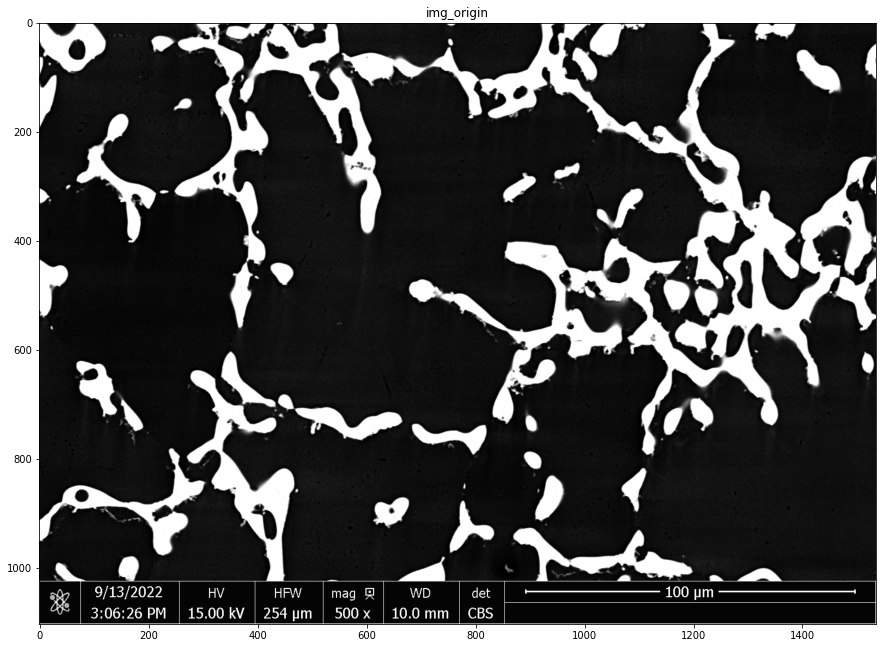

In [2]:
img_origin = cv2.imread('2-1 BSE 500X_021.tif')

fig, ax = plt.subplots(1, figsize=[15,15])

cost = ax.imshow(img_origin)
#fig.colorbar(neg, ax=ax,shrink=0.5)
ax.set_title('img_origin')
plt.show()

(1103, 1536, 3)
(773, 1208, 3)


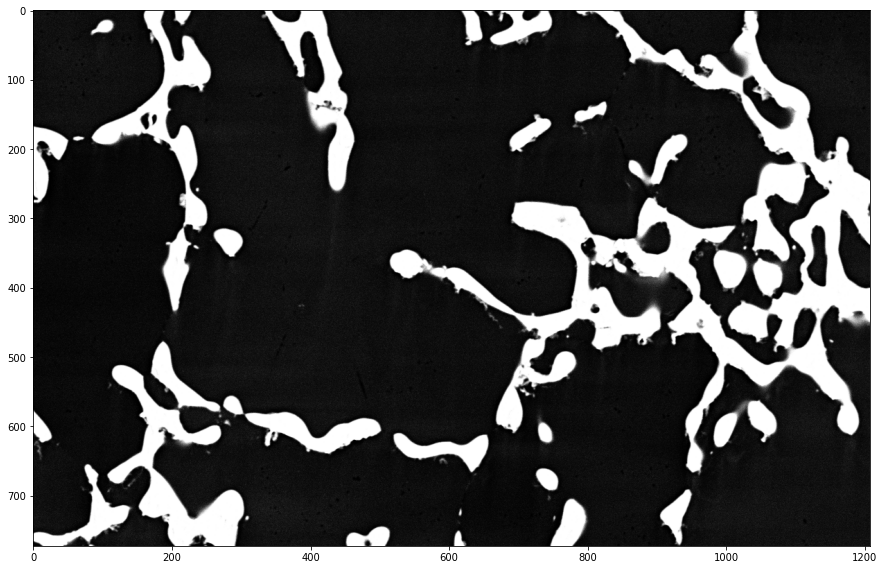

(773, 1208, 3)


In [3]:
img_size = img_origin.shape
print(img_size)
img_crop = img_origin[126:img_size[0]-204, 164:img_size[1]-164,:]
print(img_crop.shape)
fig, ax = plt.subplots(1, figsize=[15,15])
neg = ax.imshow(img_crop)
#fig.colorbar(neg, ax=ax,shrink=0.5)
#ax.set_title('img_crop')
plt.show()

print(img_crop.shape)

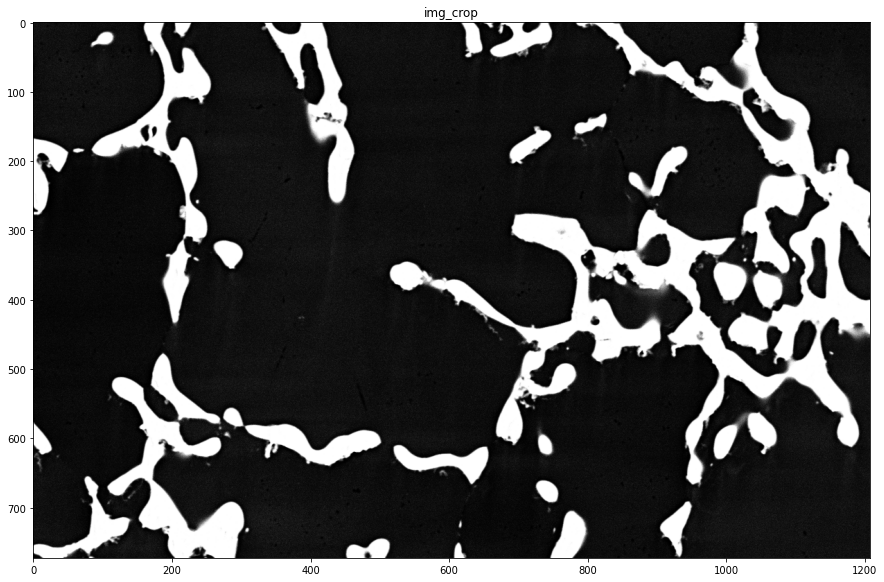

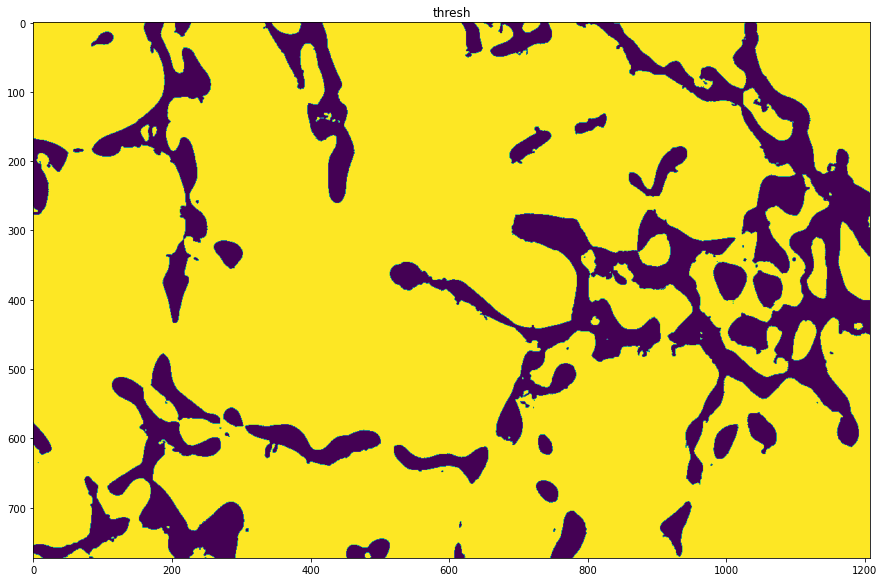

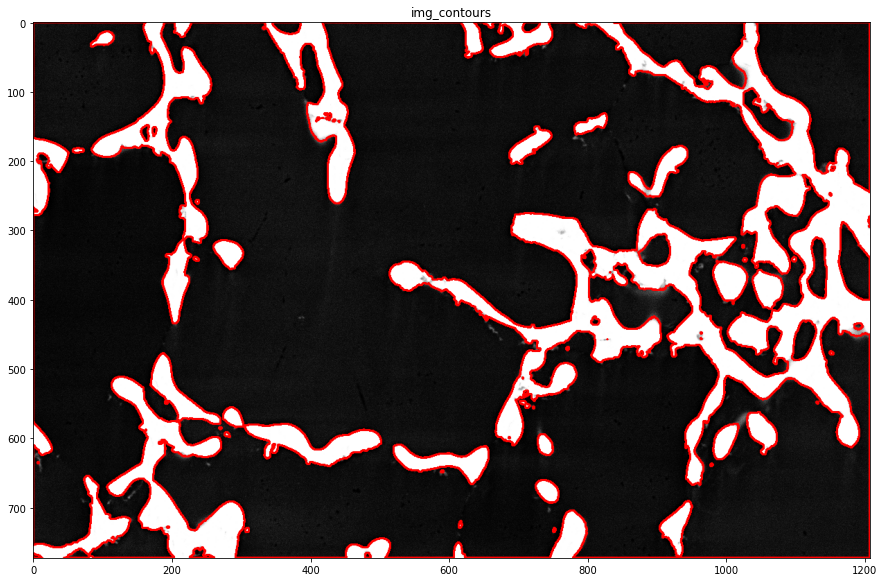

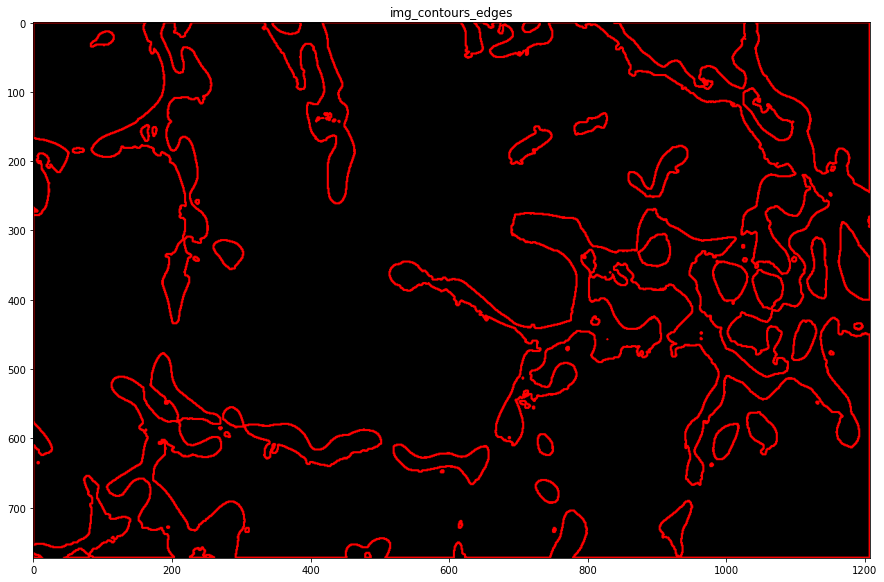

white_area_fraction = 0.8169822999751548


In [4]:
# New_Cell_2022.08.18

fig, ax = plt.subplots(1, figsize=[15,15])
neg = ax.imshow(img_crop)
ax.set_title('img_crop')
plt.show()

# Binarize the image

gray = cv2.cvtColor(img_crop,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fig, ax = plt.subplots(1, figsize=[15,15])
neg = ax.imshow(thresh)
ax.set_title('thresh')
plt.show()


contours, hierarchy  = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_contours = cv2.drawContours(img_crop, contours, -1, (255,0,0), 2)

#mask_zero = np.zeros((opening_smooth.shape[0], opening_smooth.shape[1], 4), dtype=np.uint8)
img_contours_edges = cv2.drawContours(img_crop*0, contours, -1, (255,0,0), 2)


###########################?########################
white_area = cv2.countNonZero(thresh)
total_area = thresh.shape[0] * thresh.shape[1]
white_area_fraction = white_area/total_area


fig, ax = plt.subplots(1, figsize=[15,15])
neg = ax.imshow(img_contours)
ax.set_title('img_contours')
plt.show()

fig, ax = plt.subplots(1, figsize=[15,15])
neg = ax.imshow(img_contours_edges)
ax.set_title('img_contours_edges')
plt.show()


print(f"white_area_fraction = {white_area_fraction}")


In [5]:
f = open("contour_area.csv", "w")
for m, contour in enumerate(contours):
    cnt = contours[m]
    area = cv2.contourArea(cnt)
    f.write(str(area)+"\n")
f.close()

In [6]:
f = open("alpha_contour_fixed_point_spacing_criterion.csv", "w")
for n, contour in enumerate(contours):
    approx = []
    cnt_2 = contours[n]
    ###########################?########################
    #size_criterion = 26
    if int(cv2.contourArea(cnt_2)) >= 26:
        f.write("\n")
        f.write("\n")
        f.write("pline"+"\n")
        for i in range(contour.shape[0]):

            if i%2==0:
                x = contour[i][0][0]
                y = contour[i][0][1]
                #print(x,y)
                f.write(str(x) + "," + str(y)+"\n")
                approx.append([x, y])
        #print(np.array(approx))
        #polygon_list_pointspace.append(np.array(approx))
        
    ###########################?########################
        f.write(str(contour[0][0][0]) + "," + str(contour[0][0][1])+"\n")
f.close()